In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def cheb(n):
  from numpy.matlib import repmat as repmat
  if n == 0:
    D = 0 ; x = 1
    return D,x
  else:
    x = np.cos(np.pi*np.arange(0,n+1,1)/n)
    c1 = np.array(np.ones(n-1)) ; c1 = np.append(c1,2) ; c1 = np.insert(c1,0,2)
    c2 = (-1)** np.arange(0,n +1,1)
    c = c1 * c2
    X = repmat(np.matrix(x).T,1,n+1)
    dX = X - X.T
    D = (np.matrix(c).T * 1/np.matrix(c)) / (dX+(np.eye(n+1)))
    D = D - np.diagflat(sum(D.T))
    return D,x

Text(0.5, 1.0, 'max err = 3.0965e-09')

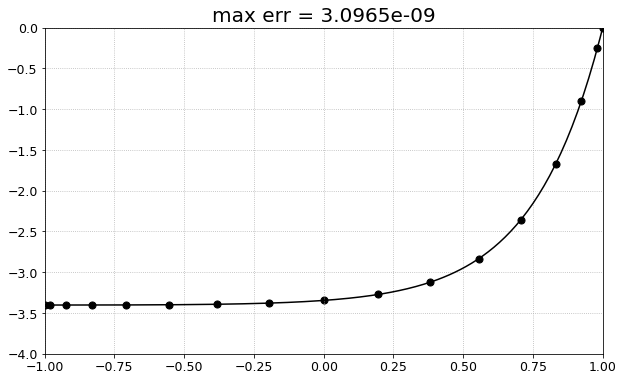

In [ ]:
N = 16
D,x = cheb(N) ; D2 = D**2 ; D2[N,:] = D[N,:] ; D2 = D2[1:N+1,1:N+1]
f = np.e**(4*x[1:N])
u = np.linalg.solve(D2,np.append(f,0)) ; u = np.insert(u,0,0)

xx = np.arange(-1,1 +0.01,0.01)
uu = np.polyval(np.polyfit(x,u,N),xx)

exact = (np.e**(4*xx) - 4*np.e**(-4)*(xx-1) - np.e**4)/16

plt.figure(figsize=(10,6))
plt.plot(xx,uu,color='black')
plt.scatter(x,u,color='black',s=50)
plt.xlim(-1,1)
plt.ylim(-4,0)
plt.xticks(fontsize=12.5)
plt.yticks(fontsize=12.5)
plt.grid(linestyle=':')
plt.title('max err = '+str(round(abs(uu-exact).max(),13)),fontsize=20)

Text(1, 0, '$\\mu$(0,0)=0.0495946503')

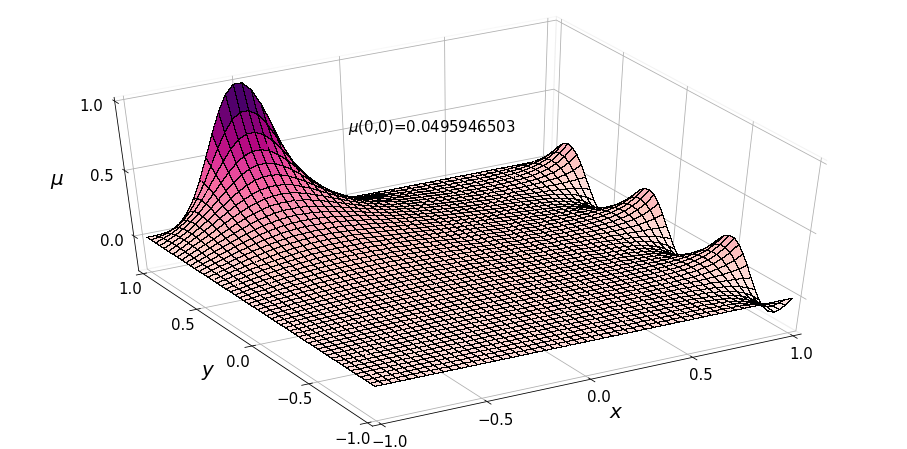

In [ ]:
plt.close()

from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

N = 24
D,x = cheb(N)
y = x ; xx,yy = np.meshgrid(x,y)
xx = xx.flatten() ; yy = yy.flatten()
D2 = D**2
I = np.eye(N+1)
L = np.kron(I,D2) + np.kron(D2,I)
b = np.argwhere((abs(xx) == 1)|(abs(yy) == 1)).flatten()
L[b,:] = np.zeros((4*N,(N+1)**2))

input_I = np.eye(4*N)
for i,j in zip(b,range(0,len(b))):
  L[i,b] = input_I[j]

rhs = np.zeros((N+1)**2)
rhs[b] = (1*(xx[b] == 1)) * (1*(yy[b] < 0)) * np.sin(np.pi*yy[b])**4 + (0.2*(yy[b] == 1)) * np.sin(3*np.pi*xx[b])

u = np.linalg.solve(L,rhs) ; uu = np.reshape(u,(N+1,N+1))


xxx,yyy = np.arange(-1,1 +0.04,0.04), np.arange(-1,1 +0.04,0.04)
xi,yi = np.meshgrid(xxx,yyy)

inter = Rbf(xx,yy,uu)
uuu = inter(xi,yi)

fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection='3d')
ax.plot_surface(xi,yi,uuu,rstride=1,cstride=1,cmap=cm.RdPu,linewidth=0.005,edgecolors='black',antialiased=False)
ax.set_xlim(1,-1) ; ax.set_ylim(-1,1) ; ax.set_zlim(-0.25,1)

ax.set_facecolor('white')
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False

ax.set_xlabel('$y$', fontsize=20,labelpad=15)
ax.set_ylabel('$x$',fontsize=20,labelpad=15)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('$\mu$', fontsize=20, rotation = 0,labelpad=15)
ax.zaxis._axinfo['juggled'] = (1,2,0)

ax.set_xticks([-1,-0.5,0,0.5,1]) ; ax.set_yticks([-1,-0.5,0,0.5,1]) ; ax.set_zticks([0,0.5,1])
for t in ax.xaxis.get_major_ticks(): t.label.set_fontsize(15)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(15)
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(15)

ax.view_init(45, -30)

ax.text(1,0,0.5,r'$\mu$(0,0)='+str(round(uu[int(N/2),int(N/2)],10)),fontsize=15)